In [242]:
#libraries 
import numpy as np
import numpy.random as rnd

#these are libraries used to plot
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

In [243]:
#this is to generate random numbers. Feel free to change this
np.random.seed(42)

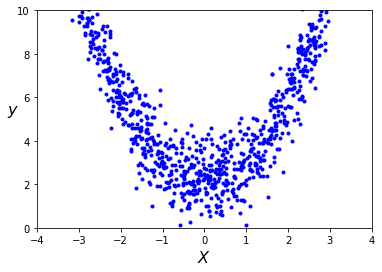

In [244]:
#Generating random data
m = 1000
X = 7 * np.random.rand(m, 1) - 4
y = X**2 + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([-4, 4, 0, 10])
plt.show()

# Fit simple linear regression model using sklearn (10 Pts)

Features here are just one dimensional as seen in X


In [245]:
#use sklearn.linear_model
#import library
from sklearn.linear_model import LinearRegression

#fit for X as training data and y as label from above and save the model in a variable called linear_reg (5 Pts)
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

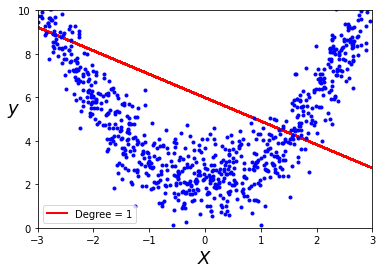

In [246]:
#Plotting the intercepts on graph
#get the predictions
y_predict = linear_reg.predict(X)
plt.plot(X, y_predict, "r-", linewidth=2, label="Degree = 1")
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="lower left", fontsize=10)
plt.axis([-3, 3, 0, 10])
plt.show()

In [247]:
#display the mean square error of your model using sklearn metrics library (5 Pts)
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

14.15148110269762

# Increase the number of features in X and run Linear Regression and report min square error (10 Pts)

#code to generate polynomial features <br>
#use sklearn PolynomialFeatures : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html <br>
#and save in poly_X (set degree to 3)<br>
#apply linear regression on poly_X<br>
#compute mean squared error<br>
#what do you observe?<br>



In [248]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly_X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(poly_X, y)
y_predict = lr.predict(poly_X)
mean_squared_error(y, y_predict)
#I noticed that mean squared error decrease a lot, it means the model is
#much more accurate now.

0.9728568072730187

# Apply lasso regression to the dataset. Did the mean square error change? (10 Pts + 5 Pts)

#Apply Lasso regression on poly_X and y

In [249]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(poly_X, y)
y_predict = lasso.predict(poly_X)
mean_squared_error(y, y_predict)
#The mean squared error increases a little bit.

1.0540298902058554

# Yet another Regression (50 Pts)

In [232]:
# download hw2_dataset.csv on canvas into a dataframe and print the top 5 samples (5 Pts)
import pandas as pd

df = pd.read_csv('hw2_dataset.csv')
df.head(5)

,feature1,values,feature2,feature3,feature4,feature5,feature6
0,Group1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Group1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Group1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Group1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Group1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [233]:
# drop column feature1 INPLACE in the dataframe loaded above (5 Pts)
df.drop('feature1', inplace=True, axis=1)
df

,values,feature2,feature3,feature4,feature5,feature6
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [234]:
#Find all correlated features in this dataframe (5 Pts)
corr_features = df.corr()
corr_features


,values,feature2,feature3,feature4,feature5,feature6
values,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
feature2,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
feature3,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
feature4,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
feature5,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
feature6,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [235]:
#drop the correlated features and load into a new dataframe. display the columns in the new dataframe (10 pts)
upper = corr_features.where(np.triu(np.ones(corr_features.shape), k=1).astype(np.bool))
#find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any (upper[column] > 0.95)]
print(to_drop)
df_new = df.drop(to_drop, axis=1)
print(df_new.columns.values)

['feature3', 'feature4']
['values' 'feature2' 'feature5' 'feature6']


In [236]:
#Prepare dataset for training. Move "values" into 'y' and all other columns into 'X' (5 pts)
y = df_new.loc[:, 'values':'values']
X = df_new.loc[:, 'feature2':'feature6']

In [237]:
# split X and y into Train and Test sets using train_test_split (70% train and 30% test) - (10 Pts)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [238]:
#run Linear Regression on this model and print the R2 error on Test  (10 Pts)
#(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html : the score function)
# learn about R2 error !
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_predict = model.predict(X_test)
R2 = model.score(X_test, y_test)
R2

0.8808605559313186

# Logistic Regression (20 Pts)

In [250]:
#load hw2_dataset.csv like above (1 Pt)
# use feature1 as label and the rest as features . So you are predicting feature1 class (binary - group1 and group2)
df1 = pd.read_csv('hw2_dataset.csv')
df1

,feature1,values,feature2,feature3,feature4,feature5,feature6
0,Group1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Group1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Group1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Group1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Group1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Group2,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Group2,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Group2,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Group2,19.7,13.2,14.3,15.2,2.8728,2.0672


In [251]:
#drop correlated features and split data into features and labels - X and y (2 Pts)
cor_matrix = df1.corr().abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
#print(to_drop)
df1_new = df1.drop(to_drop, axis=1)
#print(df1_new)
y = df1_new.loc[:, 'feature1':'feature1']
X = df1_new.loc[:, 'values':'feature6']


In [253]:
#Since y is not numeric, use LabelEncoder to encode y into encoded_y (2 Pts)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encode.fit(y.ravel())
y = encode.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [254]:
#scale features in X using MinMaxScaler (5 Pts)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[1.46666667e-01, 3.04854369e-01, 5.68334049e-01, 4.18978349e-01],
       [1.75757576e-01, 3.20388350e-01, 6.24055350e-01, 4.59235453e-01],
       [2.06060606e-01, 3.18446602e-01, 6.18123353e-01, 5.14278868e-01],
       [2.20000000e-01, 3.65048544e-01, 6.38566105e-01, 4.80364795e-01],
       [2.60606061e-01, 3.68932039e-01, 6.21965801e-01, 5.76003608e-01],
       [2.72727273e-01, 3.74757282e-01, 6.89202837e-01, 5.46882048e-01],
       [3.03030303e-01, 3.74757282e-01, 7.22699465e-01, 5.96371786e-01],
       [2.36363636e-01, 3.90291262e-01, 6.35083524e-01, 5.13419035e-01],
       [2.72727273e-01, 3.90291262e-01, 7.12565153e-01, 5.35098106e-01],
       [3.03030303e-01, 4.07766990e-01, 7.25433291e-01, 5.51392648e-01],
       [2.87878788e-01, 4.05825243e-01, 7.27534449e-01, 5.71803112e-01],
       [3.03030303e-01, 4.11650485e-01, 7.33837921e-01, 5.30982183e-01],
       [3.03030303e-01, 4.19417476e-01, 6.98303983e-01, 4.68031123e-01],
       [2.06060606e-01, 4.27184466e-01, 7.07225195e

In [276]:
#Build a Logistic Regression model and cross_validate on accuracy 5 times and 
#report the average accuracy of the model (10 Pts)

#use sklearn's cross_validate function (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression()
log_reg.fit(scaled_X, y)
scores = cross_validate(log_reg, scaled_X, y, scoring ='accuracy', cv=5)
#print(scores.keys())
avg_fit_time = scores['fit_time'].mean()
avg_score_time = scores['score_time'].mean()
avg_test_score = scores['test_score'].mean()
print(avg_fit_time, avg_score_time, avg_test_score)


0.002669668197631836 0.00025081634521484375 0.7366935483870968
